In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [79]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [80]:
data.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [81]:
#Separate the features from the response

y = data["target"].copy()
x = data.drop("target", axis = 1)

data.drop_duplicates(inplace=True)


In [82]:
data.head()
data.info()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [83]:
#Splitting the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [84]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
classifiers = [['Logistic Regression', LogisticRegression(max_iter = 1000, random_state = 42)],
               ['Support Vector Classifier', SVC(kernel='poly',degree=3,coef0=2, C=8)],
               ['Random Forest Classifier',RandomForestClassifier(n_estimators = 50, random_state = 42, max_features=7)],
               ['K-Neighbour Classifier', KNeighborsClassifier(n_neighbors = 1)],
               ['Decision Tree Classifier', DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=42)],
               ['Gradient Boosting Classifier', GradientBoostingClassifier()],
               ['Voting Classifier', VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier()), ('K-Neighbour Classifier', KNeighborsClassifier(n_neighbors = 1)), ('Random Forest Classifier', RandomForestClassifier(n_estimators = 50, random_state = 42, max_features=7))], voting='hard')]    
               ]

for classifier in classifiers:
    model = classifier[1]
    print(model)
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    print(f'Train accuracy of {classifier[0]} is {train_accuracy}')
    
    y_test_predicted = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_predicted)
    print(f'Test accuracy of {classifier[0]} is {test_accuracy}\n \n')
    
    cr = classification_report(y_test_predicted, y_test)
    print(cr)
    classifier.append(train_accuracy)
    classifier.append(test_accuracy)


LogisticRegression(max_iter=1000, random_state=42)


LogisticRegression(max_iter=1000, random_state=42)

Train accuracy of Logistic Regression is 0.8298319327731093
Test accuracy of Logistic Regression is 0.8613445378151261
 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       106
           1       0.88      0.87      0.87       132

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

SVC(C=8, coef0=2, kernel='poly')


SVC(C=8, coef0=2, kernel='poly')

Train accuracy of Support Vector Classifier is 0.9569327731092437
Test accuracy of Support Vector Classifier is 0.8907563025210085
 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       109
           1       0.89      0.91      0.90       129

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

RandomForestClassifier(max_features=7, n_estimators=50, random_state=42)


RandomForestClassifier(max_features=7, n_estimators=50, random_state=42)

Train accuracy of Random Forest Classifier is 1.0
Test accuracy of Random Forest Classifier is 0.957983193277311
 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       103
           1       0.98      0.95      0.96       135

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238

KNeighborsClassifier(n_neighbors=1)


KNeighborsClassifier(n_neighbors=1)

Train accuracy of K-Neighbour Classifier is 1.0
Test accuracy of K-Neighbour Classifier is 0.9201680672268907
 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       110
           1       0.92      0.94      0.93       128

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238

DecisionTreeClassifier(max_depth=10, random_state=42)


DecisionTreeClassifier(max_depth=10, random_state=42)

Train accuracy of Decision Tree Classifier is 0.9894957983193278
Test accuracy of Decision Tree Classifier is 0.907563025210084
 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       113
           1       0.89      0.94      0.91       125

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238

GradientBoostingClassifier()


GradientBoostingClassifier()

Train accuracy of Gradient Boosting Classifier is 0.9474789915966386
Test accuracy of Gradient Boosting Classifier is 0.9159663865546218
 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       105
           1       0.93      0.92      0.92       133

    accuracy                           0.92       238
   macro avg       0.91      0.92      0.91       238
weighted avg       0.92      0.92      0.92       238

VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier()),
                             ('K-Neighbour Classifier',
                              KNeighborsClassifier(n_neighbors=1)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_features=7,
                                                     n_estimators=50,
                                                     random_state=42))])


VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier()),
                             ('K-Neighbour Classifier',
                              KNeighborsClassifier(n_neighbors=1)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_features=7,
                                                     n_estimators=50,
                                                     random_state=42))])

Train accuracy of Voting Classifier is 1.0
Test accuracy of Voting Classifier is 0.9537815126050421
 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.97      0.95      0.96       134

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [86]:
classifiers = sorted(classifiers, key=lambda a: a[3])

<BarContainer object of 7 artists>

Text(86.1344537815126, 0, '86.13')

Text(89.07563025210085, 1, '89.08')

Text(90.75630252100841, 2, '90.76')

Text(91.59663865546219, 3, '91.6')

Text(92.01680672268907, 4, '92.02')

Text(95.37815126050421, 5, '95.38')

Text(95.7983193277311, 6, '95.8')

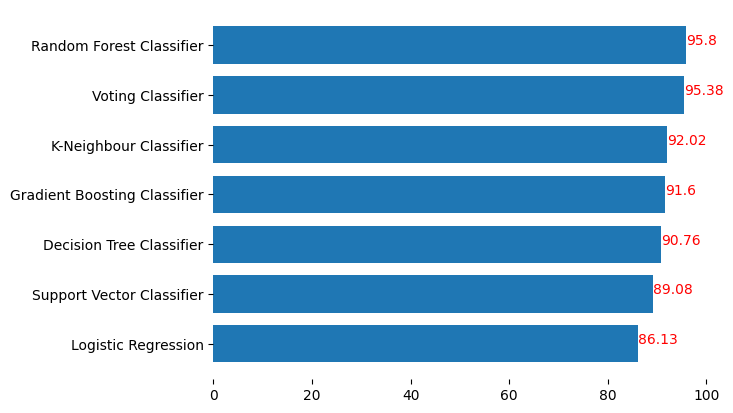

In [87]:

fig, ax=plt.subplots()
xaxis_name = [x[0] for x in classifiers]
values = [x[3]*100 for x in classifiers]

ax.barh(xaxis_name, values, 0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(values):
    ax.text(v,i, str(round(v, 2)), 
            color = 'red')
    
plt.show()

In [88]:
#Logistic Regression

l_reg = LogisticRegression(max_iter = 1000, random_state = 42)
l_reg.fit(X_train, y_train)
l_reg_predict_train = l_reg.predict(X_train)
#l_reg_predict_train = accuracy_score(y_train, l_reg_predict_train)
l_reg_acc_score_train = accuracy_score(y_train, l_reg_predict_train)

print("Train accuracy of the Logistic Regression is ", l_reg_acc_score_train,'\n')

LogisticRegression(max_iter=1000, random_state=42)

Train accuracy of the Logistic Regression is  0.8298319327731093 



Test Accuracy of Logistic Regression is 0.8613445378151261 



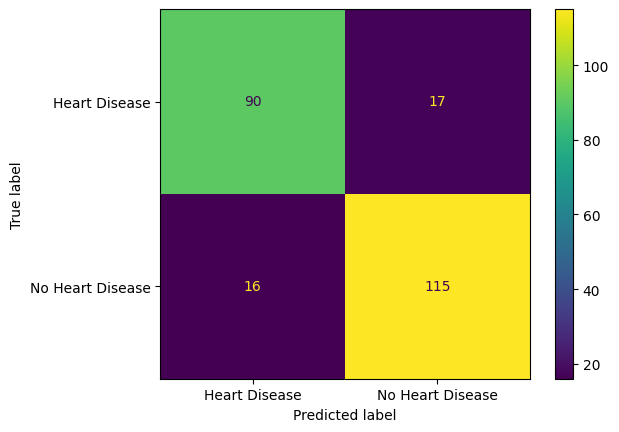

In [89]:
l_reg_predict_test = l_reg.predict(X_test)
#l_reg_predict_train = accuracy_score(y_train, l_reg_predict_train)
l_reg_acc_score_test = accuracy_score(y_test, l_reg_predict_test)

print("Test Accuracy of Logistic Regression is", l_reg_acc_score_test, '\n')

l_reg_conf_matrix = confusion_matrix(y_test, l_reg_predict_test, labels=l_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=l_reg_conf_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()

In [90]:
#Support Vector Machine(SVM)

svm_clf = SVC(kernel='poly',degree=3,coef0=2, C=8)
svm_clf.fit(X_train, y_train)
svm_predicted_train = svm_clf.predict(X_train)
svm_acc_score_train = accuracy_score(y_train, svm_predicted_train)
print("Train Accuracy of Support Vector Classifier=",svm_acc_score_train,'\n')

SVC(C=8, coef0=2, kernel='poly')

Train Accuracy of Support Vector Classifier= 0.9569327731092437 



Test Accuracy of Support Vector Classifier= 0.8907563025210085 

confusion matrix
[[ 95  12]
 [ 14 117]] 



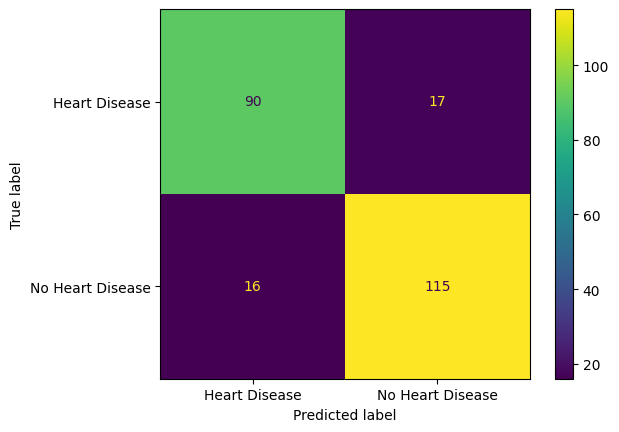

In [91]:
svm_predicted_test = svm_clf.predict(X_test)
svm_acc_score_test = accuracy_score(y_test, svm_predicted_test)
print("Test Accuracy of Support Vector Classifier=",svm_acc_score_test,'\n')
svm_conf_matrix = confusion_matrix(y_test, svm_predicted_test,labels=svm_clf.classes_)
print("confusion matrix")
print(svm_conf_matrix,'\n')
disp = ConfusionMatrixDisplay(confusion_matrix=l_reg_conf_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()

In [92]:
#Random Forest

rf = RandomForestClassifier(n_estimators = 50, random_state = 42, max_features=7)
rf.fit(X_train, y_train)
rf_predicted_train = rf.predict(X_train)
rf_acc_score_train = accuracy_score(y_train, rf_predicted_train)
print("Train Accuracy of Random Forest is", rf_acc_score_train, '\n')


RandomForestClassifier(max_features=7, n_estimators=50, random_state=42)

Train Accuracy of Random Forest is 1.0 



Test Accuracy of Random Forest is  0.957983193277311 

[[100   7]
 [  3 128]]


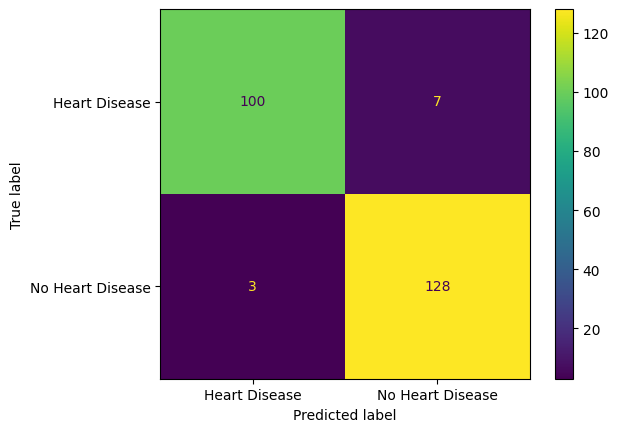

In [93]:
rf_predicted_test = rf.predict(X_test)
rf_acc_score_test = accuracy_score(y_test, rf_predicted_test)
print("Test Accuracy of Random Forest is ", rf_acc_score_test, '\n')
rf_conf_matrix = confusion_matrix(y_test, rf_predicted_test, labels=rf.classes_)
print(rf_conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()


In [94]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_predicted_train = knn.predict(X_train)
knn_acc_score_train = accuracy_score(y_train, knn_predicted_train)
print("Train Accuracy of K-NeighborsClassifier is ", knn_acc_score_train, '\n')

KNeighborsClassifier(n_neighbors=1)

Train Accuracy of K-NeighborsClassifier is  1.0 



Test Accuracy of K-NeighborsClassifier is  0.9201680672268907 

confusion matrix
[[ 99   8]
 [ 11 120]] 



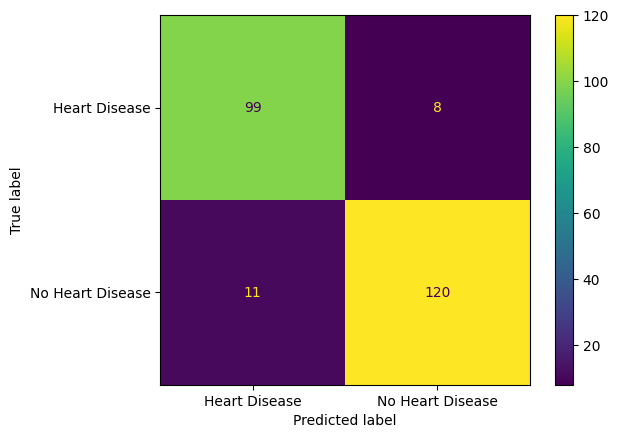

In [95]:
knn_predicted_test = knn.predict(X_test)
knn_acc_score_test = accuracy_score(y_test, knn_predicted_test)
print("Test Accuracy of K-NeighborsClassifier is ", knn_acc_score_test, '\n')

knn_conf_matrix = confusion_matrix(y_test, knn_predicted_test, labels=knn.classes_)
print("confusion matrix")
print(knn_conf_matrix,'\n')
disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()


In [96]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=42)
dt.fit(X_train, y_train)
dt_predicted_train = dt.predict(X_train)
dt_acc_score_train = accuracy_score(y_train, dt_predicted_train)
print("Train Accuracy of DecisionTreeClassifier=",dt_acc_score_train,'\n')

DecisionTreeClassifier(max_depth=10, random_state=42)

Train Accuracy of DecisionTreeClassifier= 0.9894957983193278 



Test Accuracy of DecisionTreeClassifier= 0.907563025210084 

confusion matrix
[[ 99   8]
 [ 14 117]] 



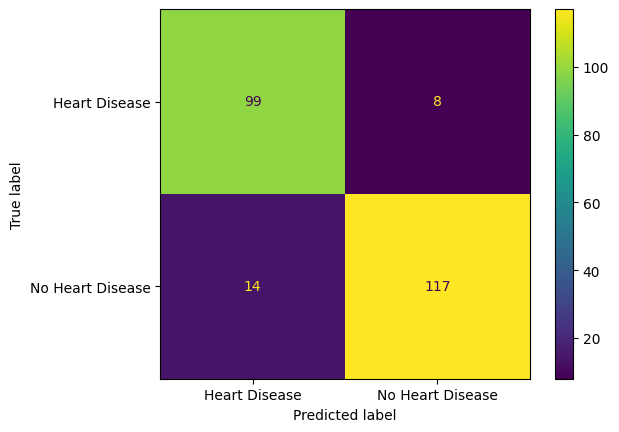

In [97]:
dt_predicted_test = dt.predict(X_test)
dt_acc_score_test = accuracy_score(y_test, dt_predicted_test)
print("Test Accuracy of DecisionTreeClassifier=",dt_acc_score_test,'\n')
dt_conf_matrix = confusion_matrix(y_test, dt_predicted_test, labels=dt.classes_)
print("confusion matrix")
print(dt_conf_matrix,'\n')
disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix,display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()

In [98]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

gbm_predicted_train = gbm.predict(X_train)

gbm_accuracy_train = accuracy_score(y_train, gbm_predicted_train)
print("Train Accuracy of GBM = ", gbm_accuracy_train)

GradientBoostingClassifier()

Train Accuracy of GBM =  0.9474789915966386


Test Accuracy of GBM =  0.9159663865546218


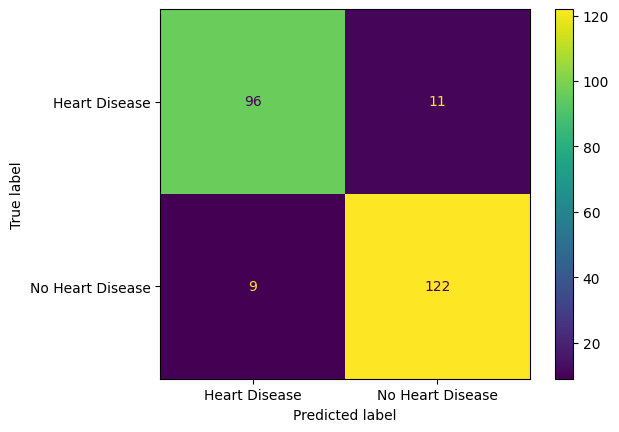

In [99]:
gbm_predicted_test = gbm.predict(X_test)
gbm_accuracy_test = accuracy_score(y_test, gbm_predicted_test)
print("Test Accuracy of GBM = ", gbm_accuracy_test)
gbm_conf_matrix = confusion_matrix(y_test, gbm_predicted_test, labels=gbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=gbm_conf_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()

In [100]:
voting_classifier = VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier()), ('K-Neighbour Classifier', KNeighborsClassifier(n_neighbors = 1)), ('Random Forest Classifier', RandomForestClassifier(n_estimators = 50, random_state = 42, max_features=7))], voting='hard')

In [101]:
voting_classifier.fit(X_train, y_train)
voting_classifier_predicted_test = voting_classifier.predict(X_test)
voting_classifier_accuracy=accuracy_score(y_test, voting_classifier_predicted_test)
voting_classifier_accuracy

VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier()),
                             ('K-Neighbour Classifier',
                              KNeighborsClassifier(n_neighbors=1)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_features=7,
                                                     n_estimators=50,
                                                     random_state=42))])

0.9537815126050421